<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# BackPropagation

Estimated time needed: **30** mins


Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.
 In this lab, we will create a neural network to implement backpropagation for a XOR problem.


# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>
1. <a href="#Import-Required-Libraries">Import Required Libraries</a><br>
2. <a href="#Initialize-Inputs">Initialize Inputs</a><br>
3. <a href="#Declare-the-network-parameters">Declare the network parameters</a><br>
4. <a href="#Define-the-weights">Define the weights</a><br>  
5. <a href="#Training-the-Neural-Network">Training the Neural Network</a><br>  
6. <a href="#Testing-the-Network">Testing the Network</a><br>  
7. <a href="#Plot-the-error">Plot the error</a><br>  

</font>
</div>


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g., your desktop, you may need to uncomment and install certain libraries.

!pip install numpy
!pip install matplotlib

  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Required Libraries


In [2]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [8]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR
print(X,"\n\n", d)

[[0 0 1 1]
 [0 1 0 1]] 

 [0 1 1 0]


# Declare the network parameters & the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`


In [4]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [5]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.05184
Epoch: 19999, Average error: 0.03025
Epoch: 29999, Average error: 0.02325
Epoch: 39999, Average error: 0.01951
Epoch: 49999, Average error: 0.01712
Epoch: 59999, Average error: 0.01542
Epoch: 69999, Average error: 0.01414
Epoch: 79999, Average error: 0.01312
Epoch: 89999, Average error: 0.01229
Epoch: 99999, Average error: 0.01160
Epoch: 109999, Average error: 0.01102
Epoch: 119999, Average error: 0.01051
Epoch: 129999, Average error: 0.01006
Epoch: 139999, Average error: 0.00967
Epoch: 149999, Average error: 0.00932
Epoch: 159999, Average error: 0.00900
Epoch: 169999, Average error: 0.00872
Epoch: 179999, Average error: 0.00846


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [9]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00947811 0.99197122 0.99193234 0.00824966]]
Ground truth [0 1 1 0]
Error after training: [[-0.00947814  0.00802881  0.00806769 -0.00824969]]
Average error: 0.00846


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


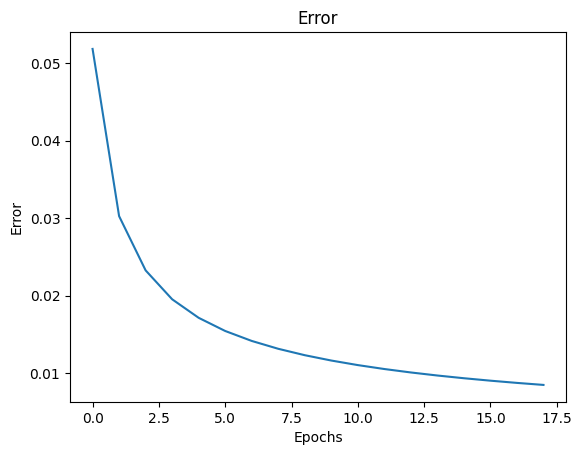

In [10]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practice exercise 1


Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.02672
Epoch: 19999, Average error: 0.01702
Epoch: 29999, Average error: 0.01330
Epoch: 39999, Average error: 0.01122
Epoch: 49999, Average error: 0.00986
Epoch: 59999, Average error: 0.00888
Epoch: 69999, Average error: 0.00813
Epoch: 79999, Average error: 0.00754
Epoch: 89999, Average error: 0.00705
Epoch: 99999, Average error: 0.00664
Epoch: 109999, Average error: 0.00630
Epoch: 119999, Average error: 0.00600
Epoch: 129999, Average error: 0.00574
Epoch: 139999, Average error: 0.00550
Epoch: 149999, Average error: 0.00530
Epoch: 159999, Average error: 0.00511
Epoch: 169999, Average error: 0.00494
Epoch: 179999, Average error: 0.00479

Final output after training: [[3.90844473e-04 5.63474637e-03 4.88993628e-03 9.91766705e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00039085 -0.00563476 -0.00488995  0.00823332]]
Average error: 0.00479


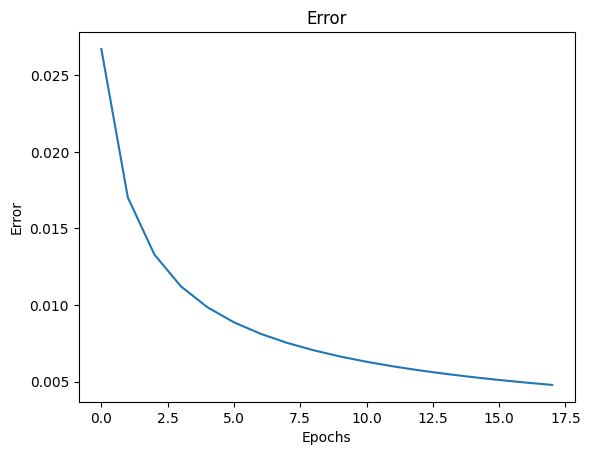

In [11]:
# Write your code here
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


# Practice exercise 2


Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


In [ ]:
# Write your code here


Double-click <b>here</b> for the solution.

<!-- Your answer is below:

lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


## Thank you for completing this lab!

This notebook was created by [Aman Aggarwal](https://www.linkedin.com/in/aggarwal-aman/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 1.0  | Aman  |  Created the lab |
<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
